<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

# Lab 6: Cost Functions and Parameter Space: Solving Models
This lab focuses on the cost function and further exploring the implications and approaches needed to solve for good model parameters. The experiments in this lab will have a more directed approach using a grid search, which will require evaluating a set of model parameters, plot the model error in the parameter space and find which model parameters give minimal modelling error.

</span>

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

### Written Summary of Results
In this lab, we look at gaussian model experiments where we do a coarse grid search to locate a region of low error and then we refine our search to find the precise minimum error point. When we made the heatmaps and the 3D plots, we can see the valleys and hills, allowing us to evaluate the model performance. We also dealt with 4 dimensional data and performed similar operations. The lab demonstrated that grid search may be a great way  to find a good combination of coefficients but when the data becomes highly dimensional, grid searching becomes a computationally expensive process.

</span>

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 1: Coarse Grid Search with Gaussian Distribution
In this experiment, we load the `gaussdist.csv` data, separate the features and responses and use the `GaussianCostFunction` to plot the data and model predictions while computing the error for given parameters.

We then perform a grid search over ranges μ(0-10) and σ(0.5-2) to visualize errors in a heat map, identify the best parameters and plot the corresponding best-fit Gaussian curve.

</span>

In [1]:

"""

    - load the gaussiandist.csv into the notebook
    - identify columns associated with the response variable and feature variable
    - the features and response variable should be stored in separate numpy arrays
    - instantiate your cost function class for GaussianCostFunction using provided data

"""

import sys
sys.path.append("C:/GitHub/Semester 5/TheoryOfMachineLearning/9_week-nine/lab/code")

from cost_functions import GaussianCostFunction, LinearCostFunction
import pandas as pd

gauss_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/9_week-nine/lab/data/gaussdist.csv")
X = gauss_df.iloc[:,0].values
y = gauss_df.iloc[:,1].values

gaussian_model = GaussianCostFunction(X, y)


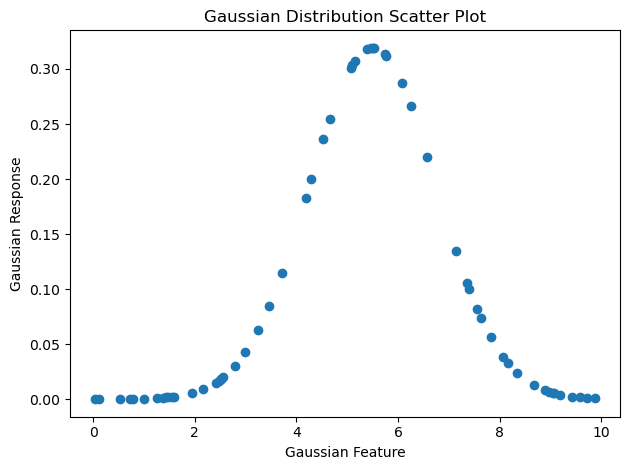

In [2]:

"""

    - plot the feature (x-axis) versus the response (y-axis) of the gaussdist.csv dataset and label it

"""

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("Gaussian Feature")
plt.ylabel("Gaussian Response")
plt.title("Gaussian Distribution Scatter Plot")
plt.tight_layout()
plt.show()



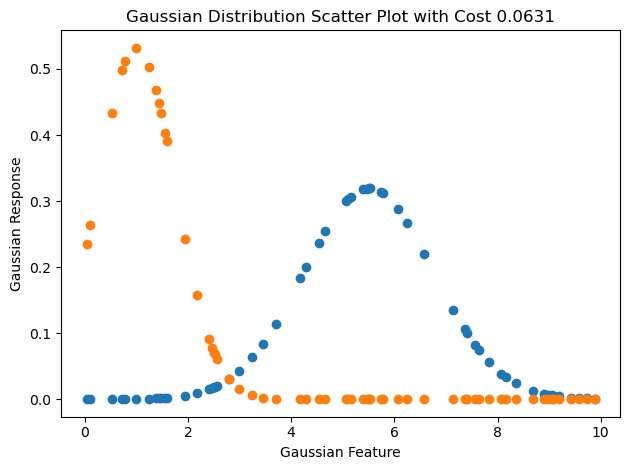

In [3]:

"""

    - use the parameter set (μ=1 and σ=0.75) and the _predict method to generate model predictions
        - plot this on the same plot as the original data

    - use the cost method to solve for the error and add this error to the plot's title

"""

params = 1, 0.75
gauss_pred = gaussian_model.predict(X, params)
gauss_mse = gaussian_model.cost(params)

plt.scatter(X, y)
plt.scatter(X, gauss_pred)
plt.xlabel("Gaussian Feature")
plt.ylabel("Gaussian Response")
plt.title(f"Gaussian Distribution Scatter Plot with Cost {gauss_mse:.4f}")
plt.tight_layout()
plt.show()



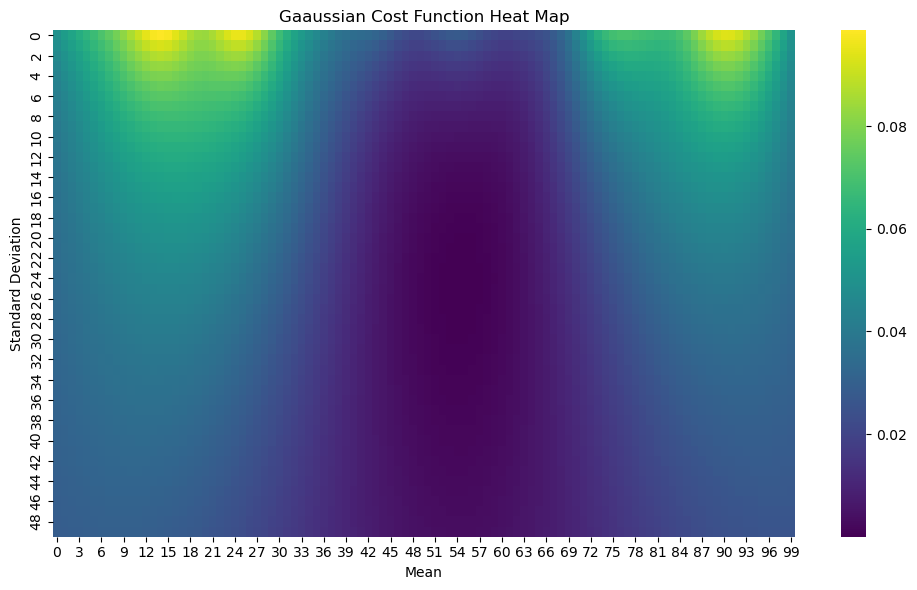

In [4]:

"""

    - create two new vectors that hold a set of values for each parameter (μ and σ)
        - range the μ from 0 to 10 (100 divisions) and σ from 0.5 to 2 (50 divisions)
    
    - plot a heatmap and label the axes

"""

import numpy as np

mu_vectors = np.linspace(0, 10, 100)
sigma_vectors = np.linspace(0.5, 2, 50)
errors = np.zeros((len(sigma_vectors), len(mu_vectors)))

# loop through the sigma and mu values
for i, sigma in enumerate(sigma_vectors):
    for j, mu in enumerate(mu_vectors):
        params = [mu, sigma]
        errors[i, j] = gaussian_model.cost(params)

# plot the heatmap
import seaborn as snsb

plt.figure(figsize=(10, 6))
sns.heatmap(errors, cmap="viridis")

plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Gaaussian Cost Function Heat Map")
plt.tight_layout()
plt.show()



Best Parameters
Sigma:  1.2653061224489797
Mu:  5.454545454545454
Error:  1.2609073784912305e-05


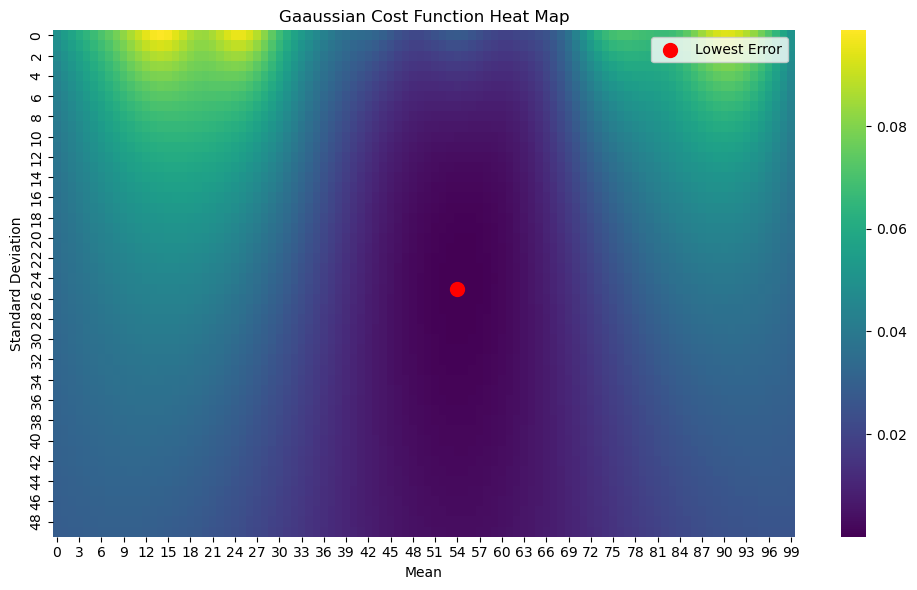

In [5]:

"""

    - pick a combination of parameters that produce a low error

"""

min_index = np.unravel_index(np.argmin(errors), errors.shape)
best_sigma = sigma_vectors[min_index[0]]
best_mu = mu_vectors[min_index[1]]
best_error = errors[min_index]

print("Best Parameters")
print("Sigma: ", best_sigma)
print("Mu: ", best_mu)
print("Error: ", best_error)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(errors, cmap="viridis")

plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Gaaussian Cost Function Heat Map")
ax.scatter(min_index[1] + 0.5, min_index[0] + 0.5, color="red", s=100, label="Lowest Error")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


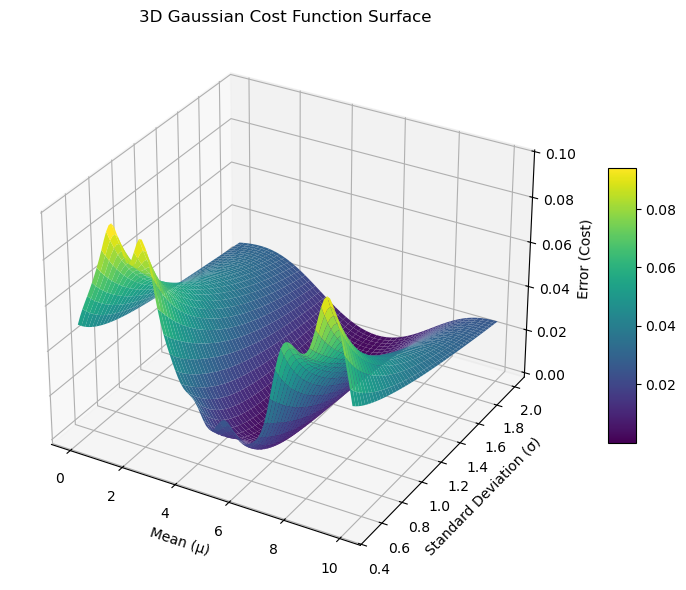

In [6]:

MU, SIGMA = np.meshgrid(mu_vectors, sigma_vectors)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(MU, SIGMA, errors, cmap="viridis", edgecolor="none")

ax.set_xlabel("Mean (μ)")
ax.set_ylabel("Standard Deviation (σ)")
ax.set_zlabel("Error (Cost)")
ax.set_title("3D Gaussian Cost Function Surface")

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

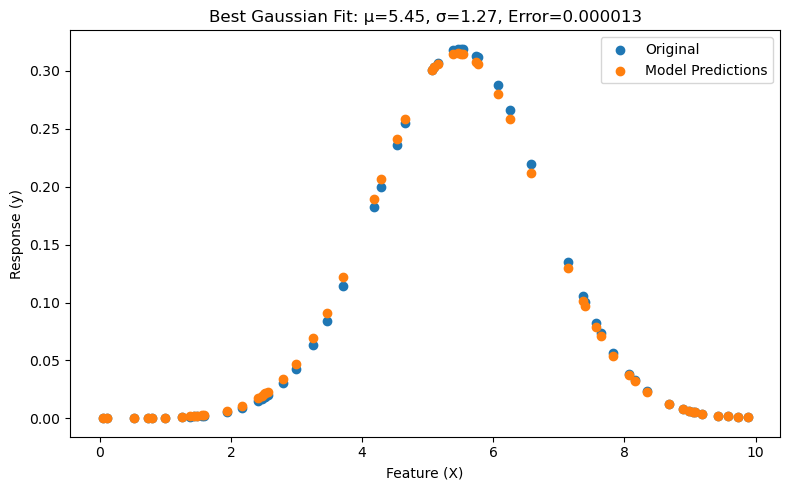

In [7]:

"""

    - calculate model predictions and plot the output on a separate plot and label it

"""

best_params = [best_mu, best_sigma]
y_pred_best = gaussian_model.predict(X, best_params)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Original")
plt.scatter(X, y_pred_best, label="Model Predictions")
plt.xlabel("Feature (X)")
plt.ylabel("Response (y)")
plt.title(f"Best Gaussian Fit: μ={best_mu:.2f}, σ={best_sigma:.2f}, Error={best_error:.6f}")
plt.legend()
plt.tight_layout()
plt.show()


<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

For the `gaussdist.csv` file, the first feature is the feature variable and the second feature is the response variable.


</span>

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 2: Refined Grid Search with Gaussian Distribution
We now repeat the grid search but now zoom in on a smaller, more precise range, set μ between 5 and 6 and σ between 1 and 1.75 using the same number of sample points. We then plot another heatmap, visually pick and verify the lowest error parameters using `np.argmin` and plot the model's predictions with the new best-fit parameters and their error.

</span>

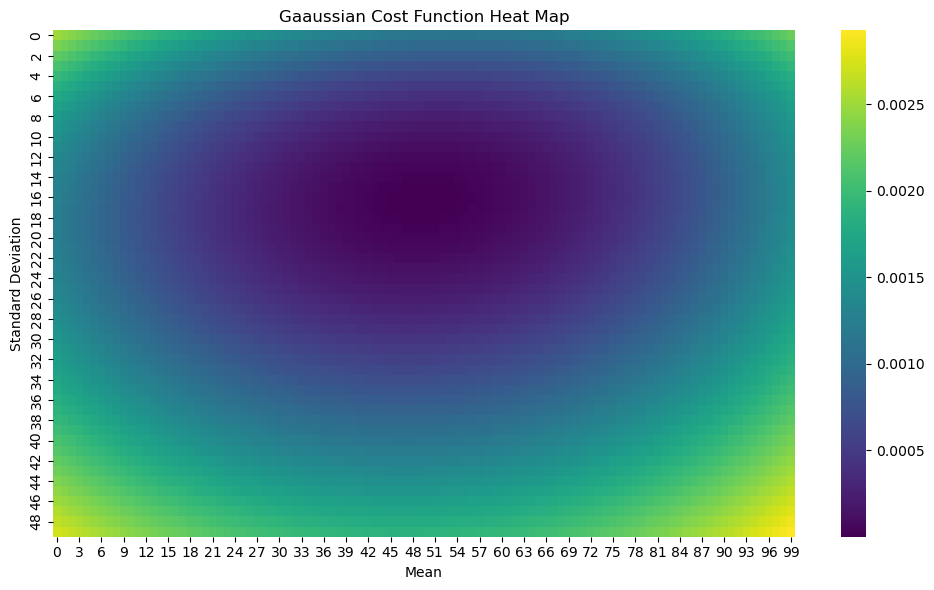

In [8]:

"""

    - corase using the same number of grid samples but this time use 6 ≥ σ ≥ 5 and 1.75 ≥ σ ≥ 1
    - plot resulting two dimensional array of error values using a heatmap

"""

mu_vectors = np.linspace(5, 6, 100)
sigma_vectors = np.linspace(1, 1.75, 50)
errors = np.zeros((len(sigma_vectors), len(mu_vectors)))

# loop through the sigma and mu values
for i, sigma in enumerate(sigma_vectors):
    for j, mu in enumerate(mu_vectors):
        params = [mu, sigma]
        errors[i, j] = gaussian_model.cost(params)

# plot the heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(errors, cmap="viridis")

plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Gaaussian Cost Function Heat Map")
plt.tight_layout()
plt.show()


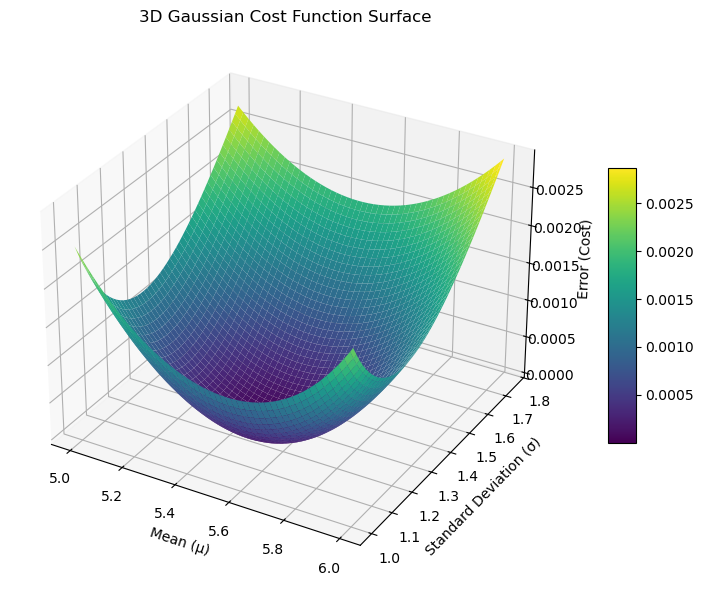

In [9]:

MU, SIGMA = np.meshgrid(mu_vectors, sigma_vectors)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(MU, SIGMA, errors, cmap="viridis", edgecolor="none")

ax.set_xlabel("Mean (μ)")
ax.set_ylabel("Standard Deviation (σ)")
ax.set_zlabel("Error (Cost)")
ax.set_title("3D Gaussian Cost Function Surface")

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

Best Parameters
Sigma:  1.2448979591836735
Mu:  5.505050505050505
Error:  4.3638539227700187e-07


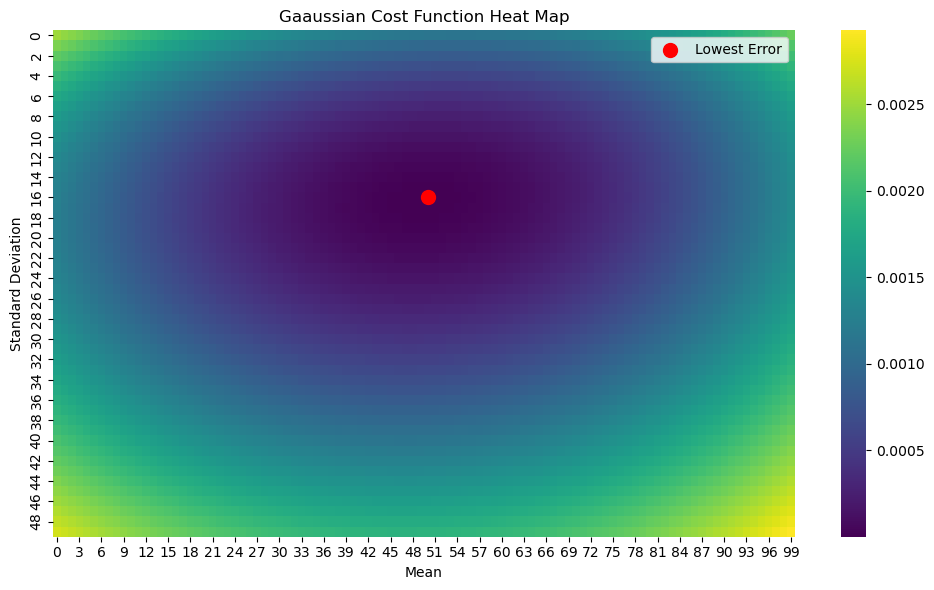

In [10]:

"""

    - pick a combination of parameters that produce a low error
    - search through the 2-dimensional array of error values to find the minimum

"""

min_index = np.unravel_index(np.argmin(errors), errors.shape)
best_sigma = sigma_vectors[min_index[0]]
best_mu = mu_vectors[min_index[1]]
best_error = errors[min_index]

print("Best Parameters")
print("Sigma: ", best_sigma)
print("Mu: ", best_mu)
print("Error: ", best_error)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(errors, cmap="viridis")

plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Gaaussian Cost Function Heat Map")
ax.scatter(min_index[1] + 0.5, min_index[0] + 0.5, color="red", s=100, label="Lowest Error")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


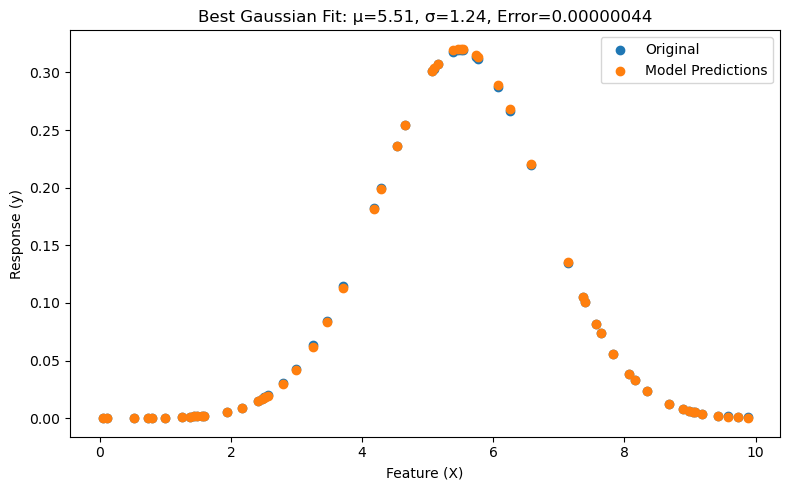

In [11]:

"""

    - calculate model predictions and plot the output on a separate plot and label it

"""

best_params = [best_mu, best_sigma]
y_pred_best = gaussian_model.predict(X, best_params)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Original")
plt.scatter(X, y_pred_best, label="Model Predictions")
plt.xlabel("Feature (X)")
plt.ylabel("Response (y)")
plt.title(f"Best Gaussian Fit: μ={best_mu:.2f}, σ={best_sigma:.2f}, Error={best_error:.8f}")
plt.legend()
plt.tight_layout()
plt.show()


<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 3: "Blind" Grid Search using the Multivariate Linear Model
In this experiment, we use the `LinearCostFunction` with the `advertisement.csv` data to perform a 4D grid search over parameters `[w₀, w₁, w₂, w₃]` starting with `[0.1, 0.1, 0.1, 0.1]` to find the combination that minimizes error using `np.argmin`.

Instead of plotting the features, we create a prediction vs response plot, including the line of identity `(y=x)` and label it with the model's error before and after finding the best-fit parameters.

</span>

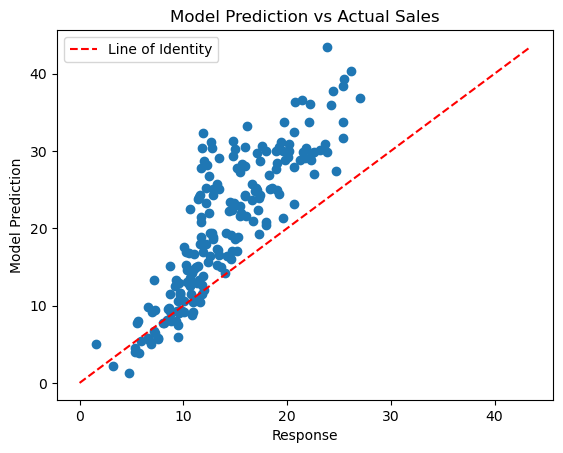

In [12]:

"""

    - plot model prediction vs a parameter set of [w0, w1, w2, w3] as [0.1, 0.1, 0.1, 0.1]
        - plot the line of identity which begins at the origin and has a slope of 1
        
"""

advert_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/9_week-nine/lab/data/advertising.csv")
X = advert_df[["Offset", "TV", "radio", "newspaper"]].values
y = advert_df["sales"].values

linear_model = LinearCostFunction(X, y)
params = np.array([0.1, 0.1, 0.1, 0.1])
y_pred = linear_model.predict(X, params)
max_val = max(y.max(), y_pred.max())

plt.scatter(y, y_pred)
plt.plot([0, max_val], [0, max_val], 'r--', label="Line of Identity")
plt.title("Model Prediction vs Actual Sales")
plt.xlabel("Response")
plt.ylabel("Model Prediction")
plt.legend()
plt.show()



Best Parameters: [-1.          0.11111111  0.11111111 -0.11111111]
Lowest Error: 41.11234197530869


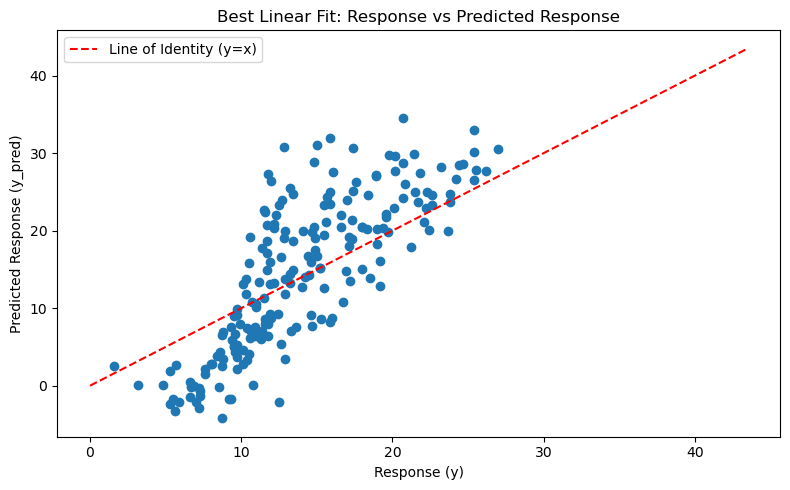

In [ ]:

"""

    - instantiate the cost function for the linear model
    - perform a grid search all four coefficients [w0, w1, w2, w3]
    - find combination of model parameters that results in lowest possible error
    - create plot of model prediction vs response using found set of parameters

"""

w0_values = np.linspace(-1, 1, 10)
w1_values = np.linspace(-1, 1, 10)
w2_values = np.linspace(-1, 1, 10)
w3_values = np.linspace(-1, 1, 10)

best_error = float('inf')
best_params = None

for w0 in w0_values:
    for w1 in w1_values:
        for w2 in w2_values:
            for w3 in w3_values:

                params = np.array([w0, w1, w2, w3])
                error = linear_model.cost(params)

                if error < best_error:
                    best_error = error
                    best_params = params

print("Best Parameters:", best_params)
print("Lowest Error:", best_error)

max_val = max(y.max(), y_pred.max())

y_pred = linear_model.predict(X, best_params)
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred)
plt.xlabel("Response (y)")
plt.ylabel("Predicted Response (y_pred)")
plt.title(f"Best Linear Fit: Response vs Predicted Response")
plt.plot([0, max_val], [0, max_val], 'r--', label="Line of Identity (y=x)")
plt.legend()
plt.tight_layout()
plt.show()



<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

# Questions
After we run all our experiments, we now answer the following questions below.


## Question 1
By looking at the provided cost_functions.py, use 1-2 sentences to describe in detail the purpose of each of the methods. To guide this description, discuss the method input, method output, and what function each method serves for the cost function.

### Answer 1
Each of the methods are just helper methods for the cost function. `predict()` takes in two parameters which are the features and the parameters (mu and sigma) and returns the predictions. The `_mse()` computes the mean squared error by finding the difference between the response and predicted variable and returns the error. All of these steps take place in the cost function itself.


## Question 2
For the heatmaps that you generated for this lab, what do they describe? What do the “valleys” and “peaks” of this heat map represent?

### Answer 2
At a basic level, the heatmap shows how well the model performs based on provided parameter values. The x-axis is one parameter and the y-axis the other (mean and standard deviation). The color represents the model's error. When it comes to darker colors, those are regions of low error. When it comes to brighter colors, those are regions of high error.

With that perspective, the valleys (dark regions) are good as the model predictions are close to the real data and peaks (bright regions) are bad, as the model predictions are far off. 


## Question 3
For experiment 2, you increased the number of samples within the specified range. 
1. Describe how the heatmap representation changed due to this increase in sampling. 
2. What benefit did this higher sampling rate have for finding the set of parameters with the minimum error? 
3. Was this sampling rate high enough? Defend your answer!

### Answer 3
1. The heatmap from the first experiment looked rough but from the second experiment the color transitions are much smoother and the valley is more visible. The heatmap from the second experiment allows for zooming in on the best-fit region, revealing a more accurate and precise view of where the minuimum error is
2. Using a higher sampling rate meant that we could nicely pinpoint the minimum error more accurately and reduce the chance of missing out on the true best-fit parameters and get a clearer, smoother heatmap
3. The sampling rate was high enough because when we plotted out a 3D plot and the valley is much more visible. The heatmap also shows a well defined minimum region and increasing the sampling rate will not make this any clearer. The cost surface is well visible in the 3D plot.


## Question 4
The Gaussian distribution model is limited to two dimensions while the multivariate linear model implemented for this lab is 4 dimensional. 
1. Describe a limitation of the grid search method as you add additional dimensions. Hint: Think about the time complexity required for the grid search as you add additional dimensions. 
2. With time complexity in mind, can you derive a rule (mathematical expression) to estimate how many grid points are needed to evaluate all combination of parameters based on the number of dimensions. 
3. With this rule, compare 2-dimensional models with 4-dimensional models. 10-dimensional? 100-dimensional?

### Answer 4
1. A limitation of the grid search method is that as more dimensions are added, the grid search becomes exponentially slower and more expensive. Every new dimension multiplies the total number of combinations, so the search space grows exponentially, making it computationally expensive to evaluate all possibilities
2. If there are n parameters and we sample m points per parameter, the total grid points being evaluated is m^n. So the run-time is O(m^n)
3. For two dimensional models with 50 sample points per parameter, total evaluations being made is 2,500. For four dimensional models, it's 50^4 which is 6,250,000 and for ten and hundred dimensional it's 50^ 10 and 50^100, which means a whole lot of evaluations making it computationally very costly. 


## Question 5
In experiment 3 you plotted the line of identity in the figure that compared the given response variable to the model prediction. 
1. What does this line represent and how is it useful? 
2. What does it mean for a value to lie above the line? Below the line? 
3. How would predictions that perfectly replicate the given data appear in this plot?

### Answer 5
1. The line of identity represents the perfect prediction, which means that every point on the line means the model's predicted value exactly matches the actual value. It's useful because it provides a way to visually evalaue the model's accuracy where points near the line mean that the predictions are accurate. 
2. When a value lies above the line, it means that the actual value is greater than the predicted value (model underpredicts) and if below, the predicted value is greater than the actual value (the model overpredicts). Points above the line mean the model is underestimating; points below the line mean it’s overestimating.
3. If the model's predictions perfectly match the given data, then every point on the plot would lie exactly on the line of identity. This means that the predicted values equal the actual values for all data points and the scatter plot would show a straight line along the line of identity, with no spread.


## Question 6
What are the weaknesses of grid search? Why wouldn't we want to use it?  

### Answer 6
The weakness of the grid search is that when we use high dimensional data, the number of combinations grow exponentially with each parameter. This makes it a very computationally expensive process. Time is also wasted testing bad combinations.



</span>